MOUNT THE DRIVE AND LOAD THE DATASET

In [54]:
#save test set predictions to a file
import os
import sys
import PIL.Image as Image
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
# pour monter son drive Google Drive local
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [56]:
my_local_drive='/content/gdrive/My Drive/Colab Notebooks/harmonie'
# Ajout du path pour les librairies, fonctions et données
sys.path.append(my_local_drive)
# Se positionner sur le répertoire associé
%cd $my_local_drive

%pwd

/content/gdrive/My Drive/Colab Notebooks/harmonie


'/content/gdrive/My Drive/Colab Notebooks/harmonie'

#open the file and get a boxplot

In [57]:
df = pd.read_csv("harmonies_data.csv",sep=",")
df.columns=["type","score"]
df.head()

,type,score
0,analog,-0.106914
1,analog,-0.105625
2,analog,-0.471869
3,analog,-0.849150
4,analog,-0.284157


In [58]:
df["type"].value_counts()

triad        101
rectangle    101
comp         101
mono         101
analog       100
Name: type, dtype: int64

In [59]:
#extract each type as a Series; and concatenate them
concatdf = pd.DataFrame()
for tpe in ["mono","analog","rectangle","comp","triad"]:
  typeSeries = df.loc[df["type"]==tpe]
  concatdf[tpe]=list(typeSeries["score"][:100])


In [60]:
concatdf.head(20)

,mono,analog,rectangle,comp,triad
0,-0.125434,-0.106914,-0.446286,-0.461240,-0.564683
1,-0.191430,-0.105625,-0.626150,-0.031113,-0.727837
2,-0.159071,-0.471869,-0.586732,-0.604456,-0.569801
3,-0.059399,-0.849150,-0.562431,-0.046913,-0.598368
4,-0.455719,-0.284157,-0.664187,-0.639854,-0.597146
5,-0.213366,-0.297793,-0.687332,-0.598499,-0.694391
6,-0.258316,-0.267313,-0.709997,-0.603437,-0.322706
7,0.081014,-0.379498,-0.464117,-0.559452,-0.580339
8,-0.141283,-0.292322,-0.658649,-0.587556,-0.531322
9,-0.092007,-0.391358,-0.653281,-0.511177,-0.360410


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


TypeError: ignored

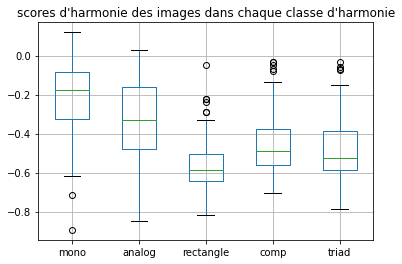

In [61]:
plt.figure()
plt.title("scores d'harmonie des images dans chaque classe d'harmonie")
plt.boxplot(concatdf.boxplot())